In [1]:
import netCDF4
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from sklearn.metrics import f1_score
from scipy import stats

In [34]:
load=np.load('p_t_Mrelu70.npz')
c_l=load['arr_0']
load=np.load('shuffled_targets_70.npz')
targets=load['arr_0'][918000:,:]
training_targets_orig=load['arr_0'][:756000,:]
load=np.load('p_t_sigmoid70.npz')
orig=load['arr_0']
load=np.load('p_t_msigmoid70.npz')
custom2=load['arr_0']
load=np.load('p_t_sigmoid37.npz')
orig37=load['arr_0']
load=np.load('p_t_msigmoid37.npz')
custom237=load['arr_0']
load=np.load('p_t_mrelu37.npz')
c_l37=load['arr_0']
load=np.load('p_t_sigmoid70_revised_set4.npz')
orig_subset3=load['arr_0']
load=np.load('p_t_Mrelu70_revised_set4.npz')
c_l_subset3=load['arr_0']
load=np.load('p_t_msigmoid70_revised_set4.npz')
custom2_subset3=load['arr_0']
load=np.load('p_t_sigmoid70_revised_set2.npz')
orig_subset1=load['arr_0']
load=np.load('p_t_Mrelu70_revised_set2.npz')
c_l_subset1=load['arr_0']
load=np.load('p_t_msigmoid70_revised_set2.npz')
custom2_subset1=load['arr_0']
load=np.load('p_t_sigmoid70_revised_set6.npz')
orig_subset2=load['arr_0']
load=np.load('p_t_Mrelu70_revised_set6.npz')
c_l_subset2=load['arr_0']
load=np.load('p_t_msigmoid70_revised_set6.npz')
custom2_subset2=load['arr_0']
load=np.load('val_mae_sigmoid70.npz')
val=load['arr_0']
load=np.load('training_mae_sigmoid70.npz')
mae=load['arr_0']
load=np.load('val_loss_sigmoid70.npz')
val_loss=load['arr_0']
load=np.load('training_loss_sigmoid70.npz')
loss=load['arr_0']
data=np.load('shuffled_data_70.npz')
data=data['arr_0']
temp=data[918000:,0:70]
newq=data[918000:,70:140]
newp=data[918000:,140:210]
Mrelu=np.load('p_t_mrelu70.npz')
sig=np.load('p_t_sigmoid70.npz')
msig=np.load('p_t_Msigmoid70.npz')
sig_sub3=np.load('p_t_sigmoid70_revised_set4.npz')
Mrelu_sub3=np.load('p_t_Mrelu70_revised_set4.npz')
Msigmoid_sub3=np.load('p_t_Msigmoid70_revised_set4.npz')
sigmoid_sub3=sig_sub3['arr_0']
sigmoid=sig['arr_0']
Mrelu_sub3=Mrelu_sub3['arr_0']
Msigmoid=msig['arr_0']
Mrelu=Mrelu['arr_0']
Msigmoid_sub3=Msigmoid_sub3['arr_0']

# Developing neural networks

## Figure 2-1

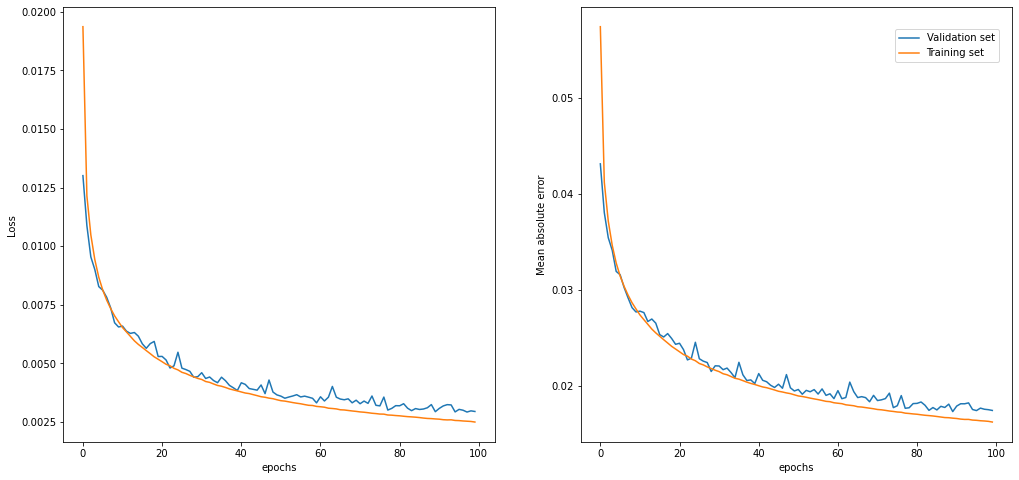

In [3]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(17)
fig.set_figheight(8)
ax[1].plot(val,label='Validation set')
ax[1].plot(mae,label='Training set')
ax[1].set(xlabel='epochs',ylabel='Mean absolute error')
ax[0].plot(val_loss)
ax[0].plot(loss)
ax[0].set(xlabel='epochs',ylabel='Loss')
fig.legend(loc="upper left", bbox_to_anchor=(0.8,0.85))
plt.show()

## Figure 2-2

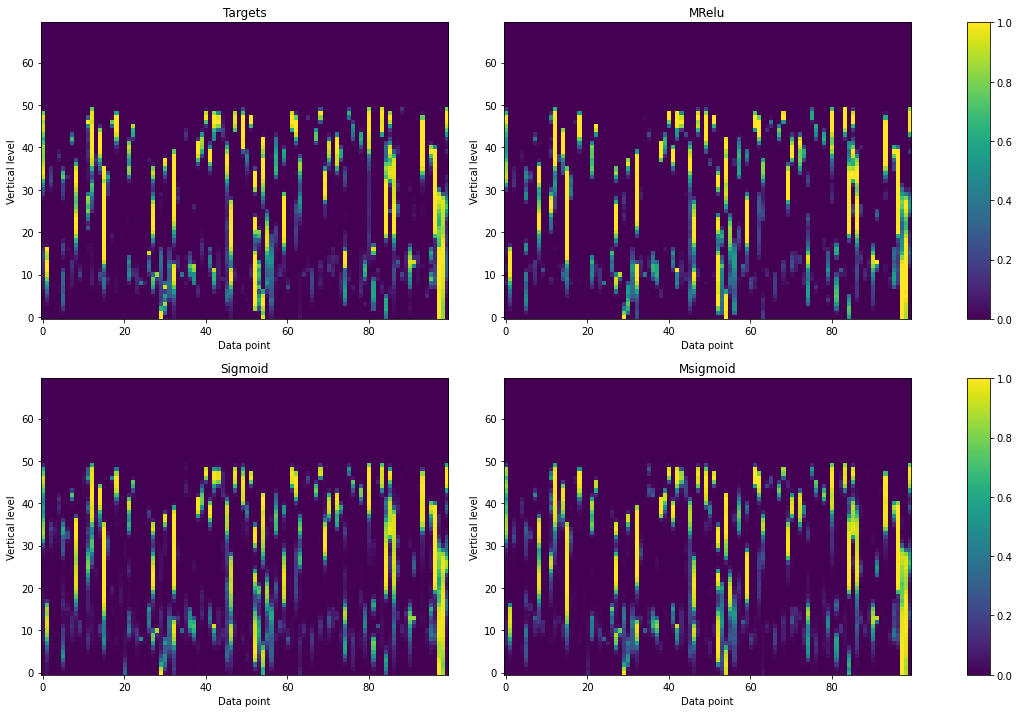

In [5]:
fig, ax = plt.subplots(2,3,gridspec_kw={'width_ratios': [18,18, 1]})
fig.set_figwidth(17)
fig.set_figheight(12)
ax[0,1].imshow(c_l[0:100,:].T, aspect='auto',origin='lower')
ax[0,1].set(ylabel='Vertical level',xlabel='Data point',title='MRelu')
ax[0,0].imshow(targets[0:100,:].T, aspect='auto',origin='lower')
ax[0,0].set(ylabel='Vertical level',xlabel='Data point',title='Targets')
ax[1,0].imshow(orig[0:100,:].T, aspect='auto',origin='lower',vmax=1,vmin=0)
ax[1,0].set(ylabel='Vertical level',xlabel='Data point',title='Sigmoid')
im=ax[1,1].imshow(custom2[0:100,:].T, aspect='auto',origin='lower',vmax=1)
ax[1,1].set(ylabel='Vertical level',xlabel='Data point',title='Msigmoid')
fig.colorbar(im,cax=ax[0,2])
fig.colorbar(im,cax=ax[1,2])
plt.show()

## Figure 2-3

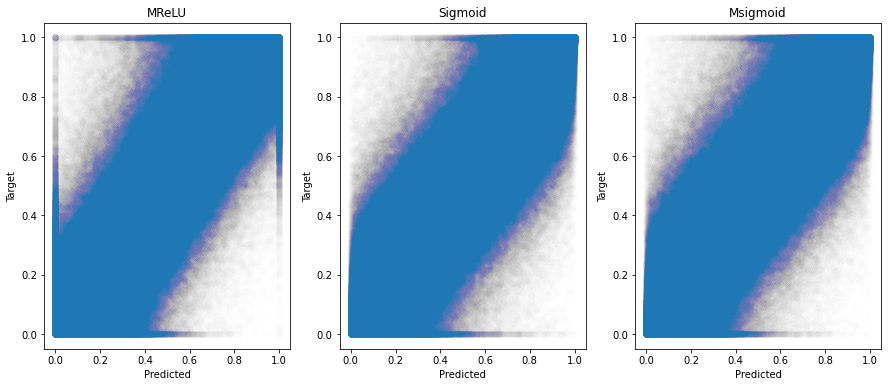

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(6)

ax1.scatter(c_l,targets,alpha=0.002)
ax1.set(xlabel='Predicted',ylabel='Target',title='MReLU')
ax2.scatter(orig,targets,alpha=0.002)
ax2.set(xlabel='Predicted',ylabel='Target',title='Sigmoid')
ax3.scatter(custom2,targets,alpha=0.002)
ax3.set(xlabel='Predicted',ylabel='Target',title='Msigmoid')

plt.show()

## Figure 2-4

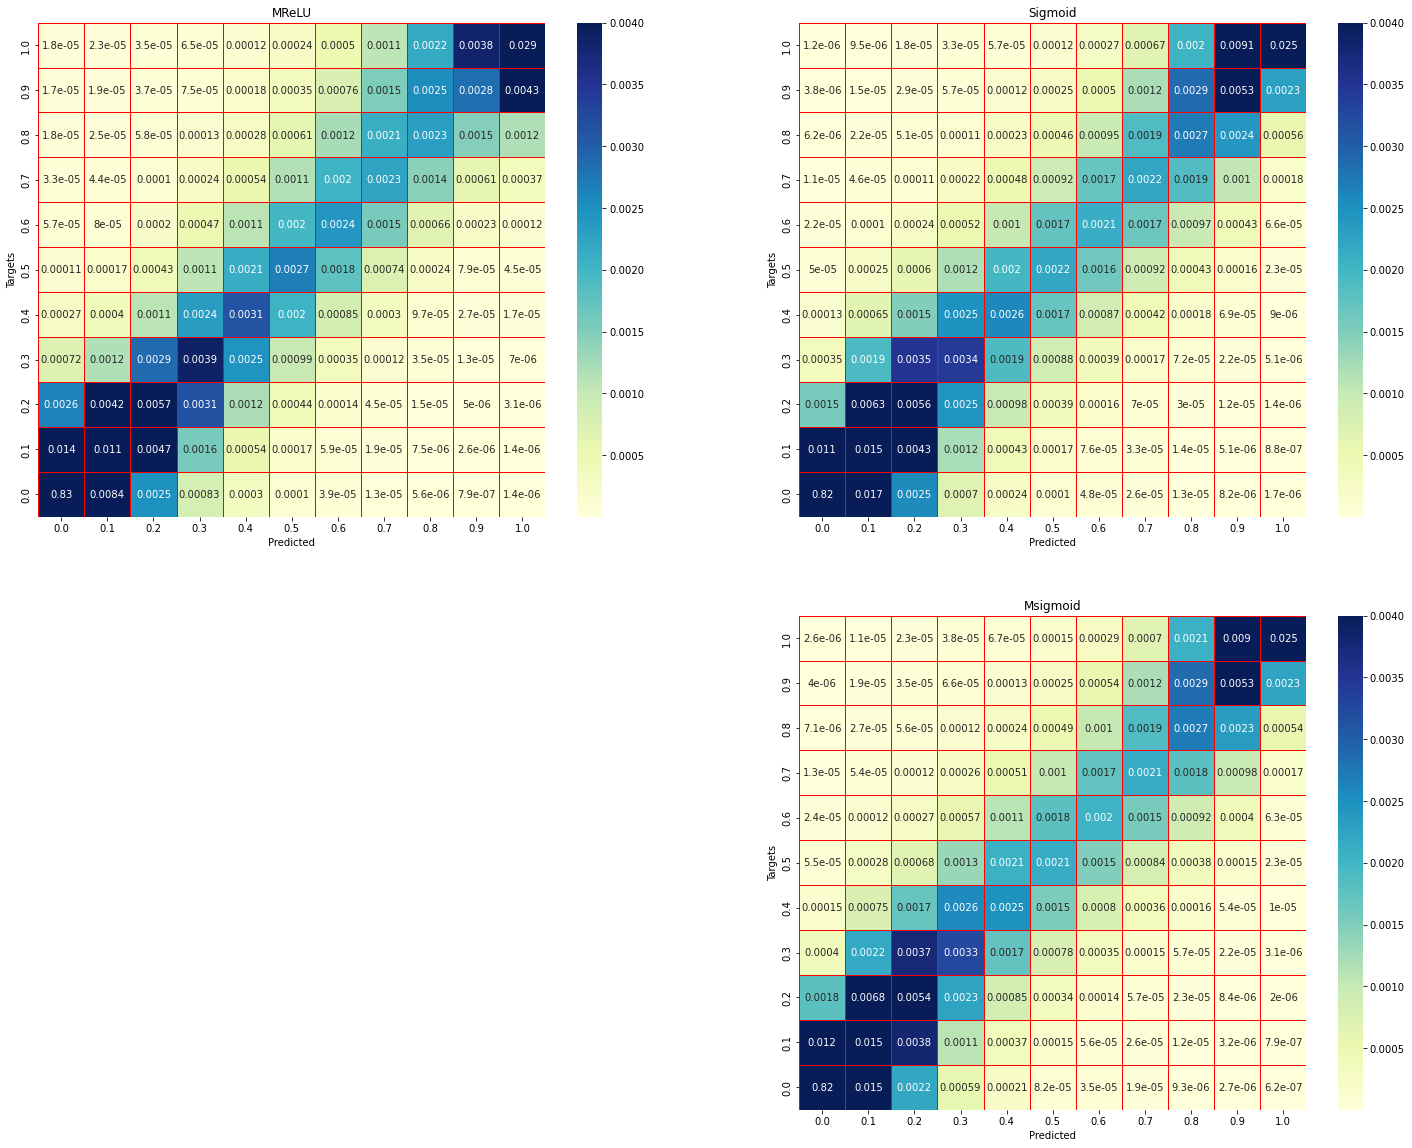

In [7]:
df=pd.DataFrame(np.round(c_l,1).flatten(),columns=['Predicted'])
df2=pd.DataFrame(np.round(targets,1).flatten(),columns=['Targets'])
df4=pd.DataFrame(np.round(orig,1).flatten(),columns=['Predicted'])
df7=pd.DataFrame(np.round(custom2,1).flatten(),columns=['Predicted'])
df3 = pd.crosstab( df2['Targets'],df['Predicted']).div(len(df))
df6 = pd.crosstab( df2['Targets'],df4['Predicted']).div(len(df))
df9 = pd.crosstab( df2['Targets'],df7['Predicted']).div(len(df))
fig, ax = plt.subplots(2,2,figsize=(25,20))
sns.heatmap(df3,linewidths=.5,ax=ax[0,0],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[0,0].invert_yaxis()
ax[0,0].set(title='MReLU')
sns.heatmap(df6,linewidths=.5,ax=ax[0,1],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[0,1].invert_yaxis()
ax[0,1].set(title='Sigmoid')
sns.heatmap(df9,linewidths=.5,ax=ax[1,1],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[1,1].invert_yaxis()
ax[1,1].set(title='Msigmoid')
fig.delaxes(ax[1,0])
plt.show()

## Figure 2-5

In [10]:
difference_sig=orig-targets
means_sig=np.array([])
for i in range(100):
    means_sig=np.append(means_sig,np.absolute(difference_sig[np.round(targets,2)==i/100]).mean())
difference_msig=custom2-targets
means_msig=np.array([])
for i in range(100):
    means_msig=np.append(means_msig,np.absolute(difference_msig[np.round(targets,2)==i/100]).mean())
difference_mrelu=c_l-targets
means_mrelu=np.array([])
for i in range(100):
    means_mrelu=np.append(means_mrelu,np.absolute(difference_mrelu[np.round(targets,2)==i/100]).mean())
difference_sig37=orig37-targets[:,0:37]
means_sig37=np.array([])
for i in range(100):
    means_sig37=np.append(means_sig37,np.absolute(difference_sig37[np.round(targets[:,0:37],2)==i/100]).mean())
difference_msig37=custom237-targets[:,0:37]
means_msig37=np.array([])
for i in range(100):
    means_msig37=np.append(means_msig37,np.absolute(difference_msig37[np.round(targets[:,0:37],2)==i/100]).mean())
difference_mrelu37=c_l37-targets[:,0:37]
means_mrelu37=np.array([])
for i in range(100):
    means_mrelu37=np.append(means_mrelu37,np.absolute(difference_mrelu37[np.round(targets[:,0:37],2)==i/100]).mean())

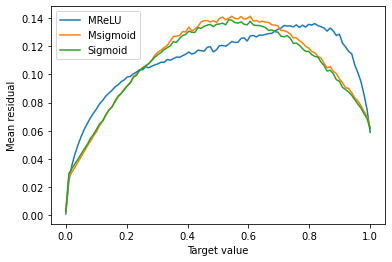

In [11]:
plt.plot(np.linspace(0,1,100),means_mrelu,label='MReLU')
plt.plot(np.linspace(0,1,100),means_msig,label='Msigmoid')
plt.plot(np.linspace(0,1,100),means_sig,label='Sigmoid')
plt.xlabel('Target value')
plt.ylabel('Mean residual')
plt.legend()
plt.show()

## Figure 2-6

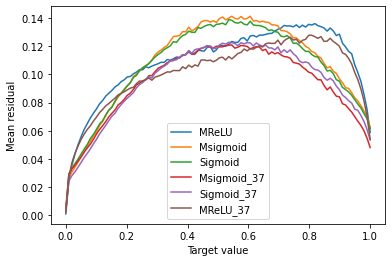

In [13]:
plt.plot(np.linspace(0,1,100),means_mrelu,label='MReLU')
plt.plot(np.linspace(0,1,100),means_msig,label='Msigmoid')
plt.plot(np.linspace(0,1,100),means_sig,label='Sigmoid')
plt.plot(np.linspace(0,1,100),means_msig37,label='Msigmoid_37')
plt.plot(np.linspace(0,1,100),means_sig37,label='Sigmoid_37')
plt.plot(np.linspace(0,1,100),means_mrelu37,label='MReLU_37')
plt.xlabel('Target value')
plt.ylabel('Mean residual')
plt.legend()
plt.show()

## Figure 2-7

In [15]:
cloud_count_orig=[(training_targets_orig[0,:]).sum()]
for i in range(1,756000):
    count = (training_targets_orig[i,:]).sum()
    cloud_count_orig=np.append(cloud_count_orig,count)

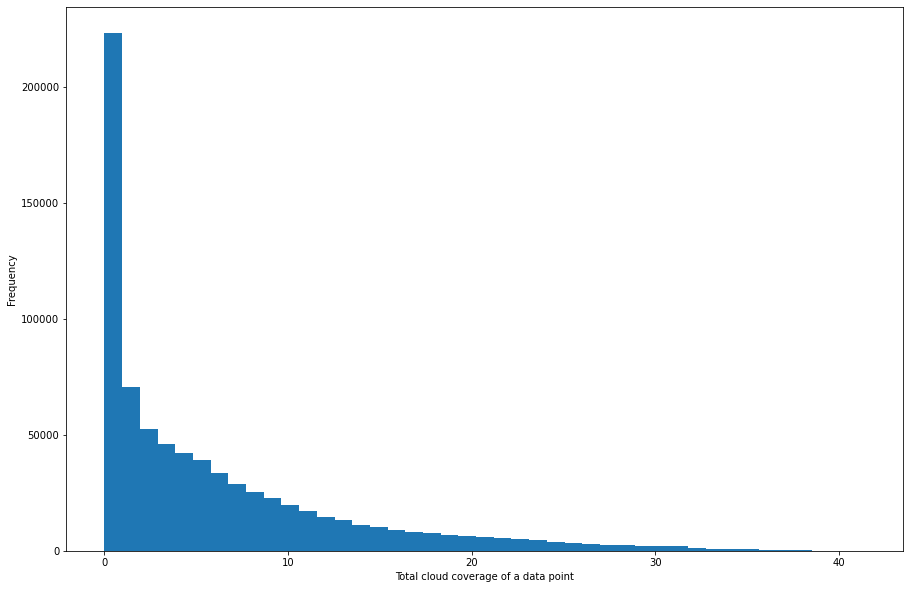

In [16]:
plt.figure(figsize=(15, 10))
plt.hist(cloud_count_orig,bins=43)
plt.ylabel('Frequency')
plt.xlabel('Total cloud coverage of a data point')
plt.show()

## Figure 2-8

In [17]:
cloud_count=[(targets[0,:]).sum()]
for i in range(1,162000):
    count = (targets[i,:]).sum()
    cloud_count=np.append(cloud_count,count)

In [18]:
difference_sig=orig-targets
difference_msig=custom2-targets
difference_mrelu=c_l-targets
difference_sig_sub1=orig_subset1-targets
difference_mrelu_sub1=c_l_subset1-targets
difference_msig_sub1=custom2_subset1-targets
difference_sig_sub2=orig_subset2-targets
difference_mrelu_sub2=c_l_subset2-targets
difference_msig_sub2=custom2_subset2-targets
difference_sig_sub3=orig_subset3-targets
difference_mrelu_sub3=c_l_subset3-targets
difference_msig_sub3=custom2_subset3-targets
means_msig_sub3=np.array([])
means_mrelu_sub3=np.array([])
means_sig_sub3=np.array([])
means_msig_sub2=np.array([])
means_mrelu_sub2=np.array([])
means_sig_sub2=np.array([])
means_msig_sub1=np.array([])
means_mrelu_sub1=np.array([])
means_sig_sub1=np.array([])
means_mrelu=np.array([])
means_msig=np.array([])
means_sig=np.array([])

for i in range(71):
    means_sig=np.append(means_sig,np.absolute(difference_sig[np.round(cloud_count,0)==i,:]).mean())
    means_msig=np.append(means_msig,np.absolute(difference_msig[np.round(cloud_count,0)==i,:]).mean())
    means_mrelu=np.append(means_mrelu,np.absolute(difference_mrelu[np.round(cloud_count,0)==i,:]).mean())
    means_sig_sub1=np.append(means_sig_sub1,np.absolute(difference_sig_sub1[np.round(cloud_count,0)==i,:]).mean())
    means_mrelu_sub1=np.append(means_mrelu_sub1,np.absolute(difference_mrelu_sub1[np.round(cloud_count,0)==i,:]).mean())
    means_msig_sub1=np.append(means_msig_sub1,np.absolute(difference_msig_sub1[np.round(cloud_count,0)==i,:]).mean())
    means_sig_sub2=np.append(means_sig_sub2,np.absolute(difference_sig_sub2[np.round(cloud_count,0)==i,:]).mean())
    means_mrelu_sub2=np.append(means_mrelu_sub2,np.absolute(difference_mrelu_sub2[np.round(cloud_count,0)==i,:]).mean())
    means_msig_sub2=np.append(means_msig_sub2,np.absolute(difference_msig_sub2[np.round(cloud_count,0)==i,:]).mean())
    means_sig_sub3=np.append(means_sig_sub3,np.absolute(difference_sig_sub3[np.round(cloud_count,0)==i,:]).mean())
    means_mrelu_sub3=np.append(means_mrelu_sub3,np.absolute(difference_mrelu_sub3[np.round(cloud_count,0)==i,:]).mean())
    means_msig_sub3=np.append(means_msig_sub3,np.absolute(difference_msig_sub3[np.round(cloud_count,0)==i,:]).mean())

/Users/Toby/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice.
/Users/Toby/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/Users/Toby/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice.
/Users/Toby/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice.
/Users/Toby/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
/Users/Toby/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice.
/Users/Toby/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice.
/Users/Tob

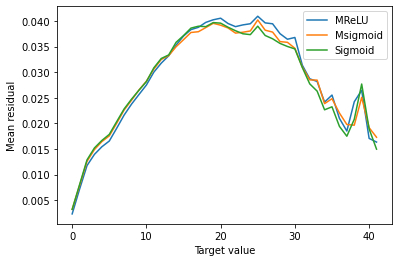

In [20]:
plt.plot(np.linspace(0,70,71),means_mrelu,label='MReLU')
plt.plot(np.linspace(0,70,71),means_msig,label='Msigmoid')
plt.plot(np.linspace(0,70,71),means_sig,label='Sigmoid')
plt.xlabel('Target value')
plt.ylabel('Mean residual')
plt.legend()
plt.show()

## Figure 2-9

In [21]:
load=np.load('perm_to_decide_on_the_quater.npz')
perm=load['arr_0']

In [22]:
indx=np.where((training_targets_orig).sum(axis=1)<1)
not_indx=np.where((training_targets_orig).sum(axis=1)>=1)
others_out=training_targets_orig[not_indx]
subset_out=training_targets_orig[indx]
shuffled_subset_out=subset_out[perm]
training_targets_sample2=np.append(others_out,shuffled_subset_out[:int(np.floor(shuffled_subset_out.shape[0]/4))],axis=0)

In [23]:
cloud_count_sample2=[(training_targets_sample2[0,:]).sum()]
for i in range(1,training_targets_sample2.shape[0]):
    count = (training_targets_sample2[i,:]).sum()
    cloud_count_sample2=np.append(cloud_count_sample2,count)

In [24]:
training_targets_sample1=training_targets_orig
for i in range(8,30):
    indx=np.where(np.logical_and((training_targets_orig).sum(axis=1)>i,(training_targets_orig).sum(axis=1)<=i+1))
    num_repeats=int(np.floor(80000/np.shape(indx)[1]))
    training_targets_sample1=np.append(training_targets_sample1,np.repeat(training_targets_orig[indx],num_repeats,axis=0),axis=0)

In [25]:
cloud_count_sample1=[(training_targets_sample1[0,:]).sum()]
for i in range(1,training_targets_sample1.shape[0]):
    count = (training_targets_sample1[i,:]).sum()
    cloud_count_sample1=np.append(cloud_count_sample1,count)

In [26]:
indx=np.where((training_targets_orig).sum(axis=1)>1)
training_targets_new=np.append(training_targets_orig,training_targets_orig[indx],axis=0)
training_targets_new=np.append(training_targets_new,training_targets_orig[indx],axis=0)
training_targets_sample3=np.append(training_targets_new,training_targets_orig[indx],axis=0)

In [27]:
cloud_count_sample3=[(training_targets_sample3[0,:]).sum()]
for i in range(1,training_targets_sample3.shape[0]):
    count = (training_targets_sample3[i,:]).sum()
    cloud_count_sample3=np.append(cloud_count_sample3,count)

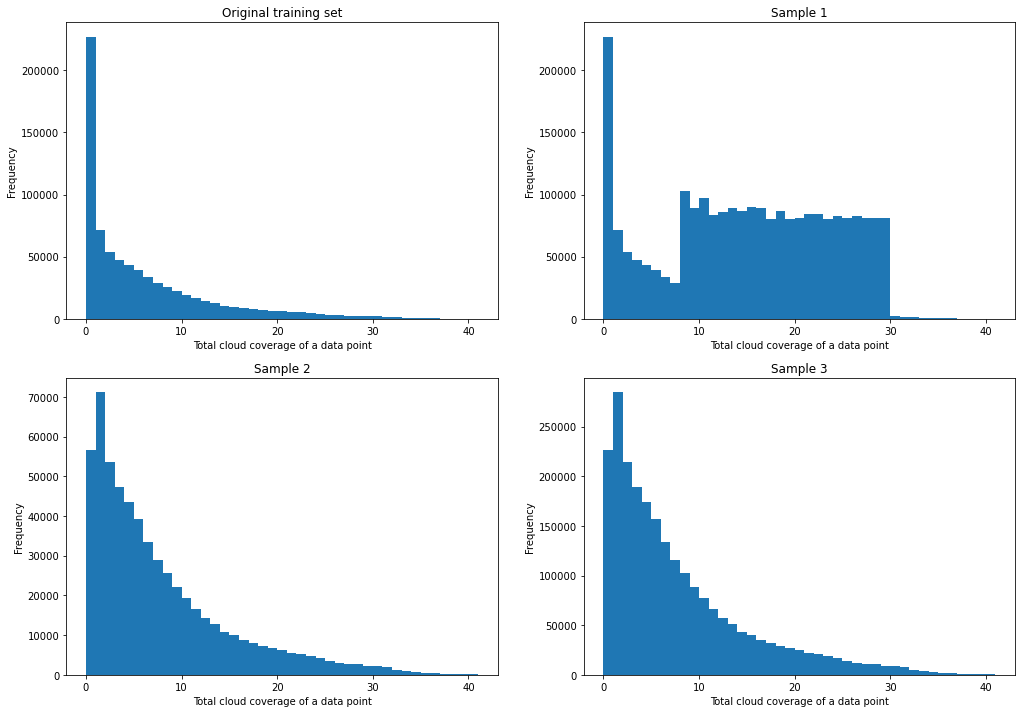

In [28]:
fig, ax = plt.subplots(2,2)
fig.set_figwidth(17)
fig.set_figheight(12)
ax[0,0].hist(cloud_count_orig,bins=np.arange(42))
ax[0,0].set(ylabel='Frequency',xlabel='Total cloud coverage of a data point',title='Original training set')
ax[0,1].hist(cloud_count_sample1,bins=np.arange(42))
ax[0,1].set(ylabel='Frequency',xlabel='Total cloud coverage of a data point',title='Sample 1')
ax[1,0].hist(cloud_count_sample2,bins=np.arange(42))
ax[1,0].set(ylabel='Frequency',xlabel='Total cloud coverage of a data point',title='Sample 2')
ax[1,1].hist(cloud_count_sample3,bins=np.arange(42))
ax[1,1].set(ylabel='Frequency',xlabel='Total cloud coverage of a data point',title='Sample 3')
plt.show()

## Figure 2-10

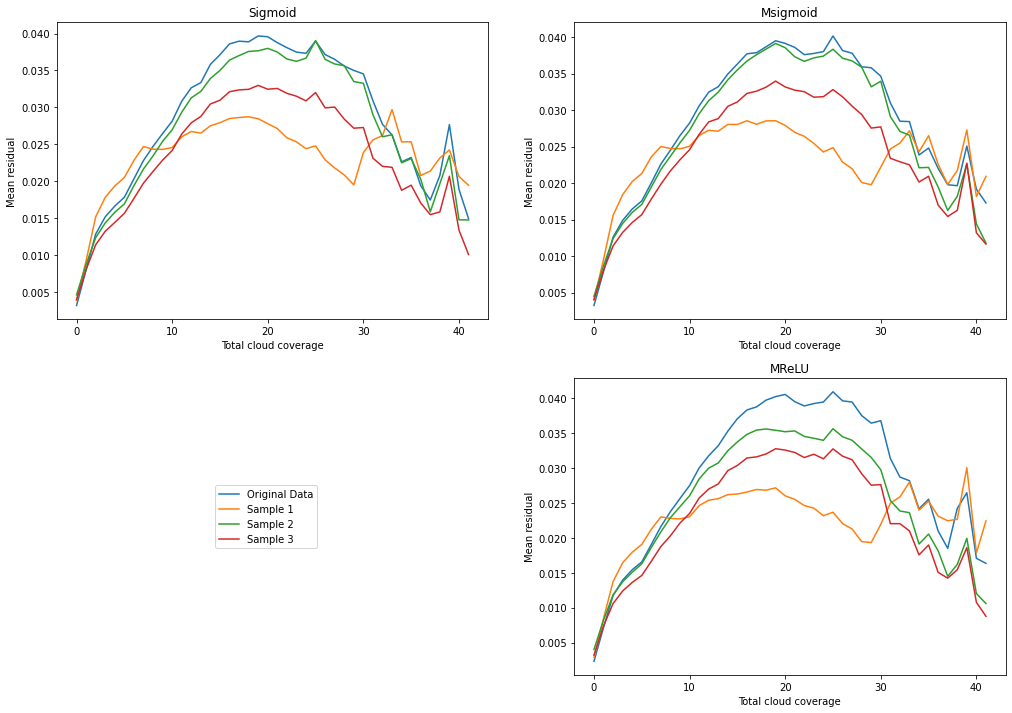

In [29]:
fig, ax = plt.subplots(2,2)
fig.set_figwidth(17)
fig.set_figheight(12)
ax[0,0].plot(np.linspace(0,70,71),means_sig,label='Original Data')
ax[0,0].plot(np.linspace(0,70,71),means_sig_sub1,label='Sample 1')
ax[0,0].plot(np.linspace(0,70,71),means_sig_sub2,label='Sample 2')
ax[0,0].plot(np.linspace(0,70,71),means_sig_sub3,label='Sample 3')
ax[0,1].plot(np.linspace(0,70,71),means_msig)
ax[0,1].plot(np.linspace(0,70,71),means_msig_sub1)
ax[0,1].plot(np.linspace(0,70,71),means_msig_sub2)
ax[0,1].plot(np.linspace(0,70,71),means_msig_sub3)
ax[1,1].plot(np.linspace(0,70,71),means_mrelu)
ax[1,1].plot(np.linspace(0,70,71),means_mrelu_sub1)
ax[1,1].plot(np.linspace(0,70,71),means_mrelu_sub2)
ax[1,1].plot(np.linspace(0,70,71),means_mrelu_sub3)
ax[0,0].set(title='Sigmoid',ylabel='Mean residual',xlabel='Total cloud coverage')
ax[0,0].set(title='Sigmoid',ylabel='Mean residual',xlabel='Total cloud coverage')
ax[0,0].set(title='Sigmoid',ylabel='Mean residual',xlabel='Total cloud coverage')
ax[0,1].set(title='Msigmoid',ylabel='Mean residual',xlabel='Total cloud coverage')
ax[0,1].set(title='Msigmoid',ylabel='Mean residual',xlabel='Total cloud coverage')
ax[0,1].set(title='Msigmoid',ylabel='Mean residual',xlabel='Total cloud coverage')
ax[1,1].set(title='MReLU',ylabel='Mean residual',xlabel='Total cloud coverage')
ax[1,1].set(title='MReLU',ylabel='Mean residual',xlabel='Total cloud coverage')
ax[1,1].set(title='MReLU',ylabel='Mean residual',xlabel='Total cloud coverage')
fig.delaxes(ax[1,0])
fig.legend(loc="upper left", bbox_to_anchor=(0.25,0.35))
plt.show()

## Figure 2-11

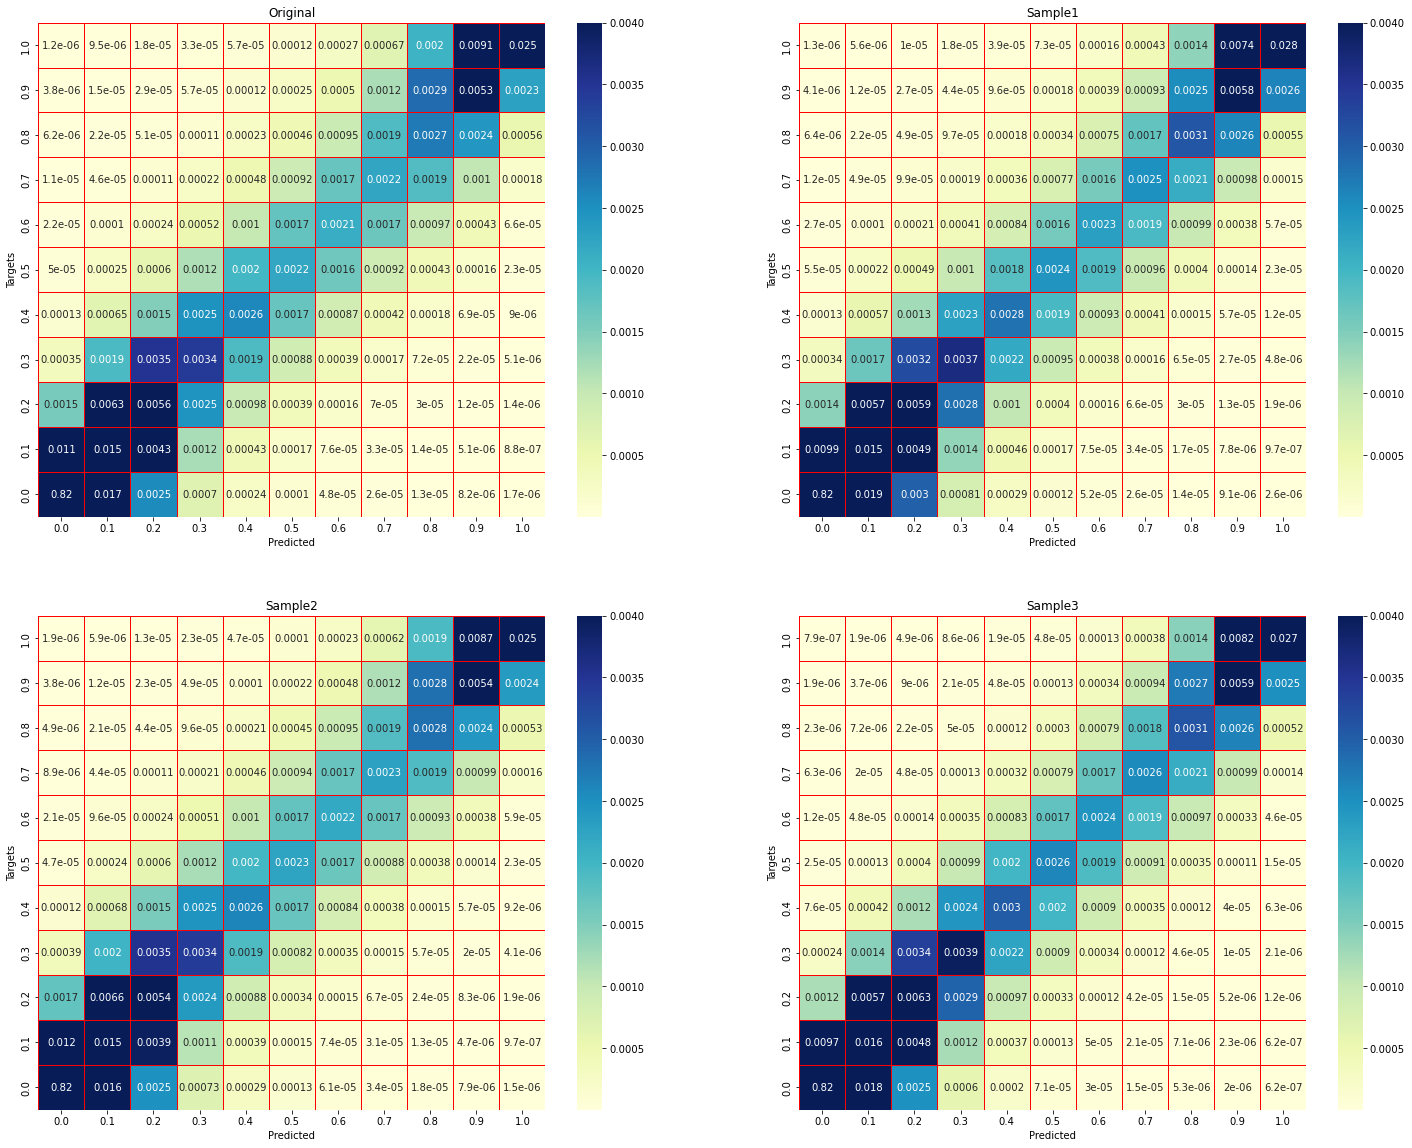

In [31]:
df=pd.DataFrame(np.round(orig,1).flatten(),columns=['Predicted'])
df2=pd.DataFrame(np.round(targets,1).flatten(),columns=['Targets'])
df4=pd.DataFrame(np.round(orig_subset1,1).flatten(),columns=['Predicted'])
df7=pd.DataFrame(np.round(orig_subset2,1).flatten(),columns=['Predicted'])
df10=pd.DataFrame(np.round(orig_subset3,1).flatten(),columns=['Predicted'])
df3 = pd.crosstab( df2['Targets'],df['Predicted']).div(len(df))
df6 = pd.crosstab( df2['Targets'],df4['Predicted']).div(len(df))
df9 = pd.crosstab( df2['Targets'],df7['Predicted']).div(len(df))
df11 = pd.crosstab( df2['Targets'],df10['Predicted']).div(len(df))
fig, ax = plt.subplots(2,2,figsize=(25,20))
sns.heatmap(df3,linewidths=.5,ax=ax[0,0],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[0,0].invert_yaxis()
ax[0,0].set(title='Original')
sns.heatmap(df6,linewidths=.5,ax=ax[0,1],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[0,1].invert_yaxis()
ax[0,1].set(title='Sample1')
sns.heatmap(df9,linewidths=.5,ax=ax[1,0],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[1,0].invert_yaxis()
ax[1,0].set(title='Sample2')
sns.heatmap(df11,linewidths=.5,ax=ax[1,1],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[1,1].invert_yaxis()
ax[1,1].set(title='Sample3')
plt.show()

## Figure 2-12

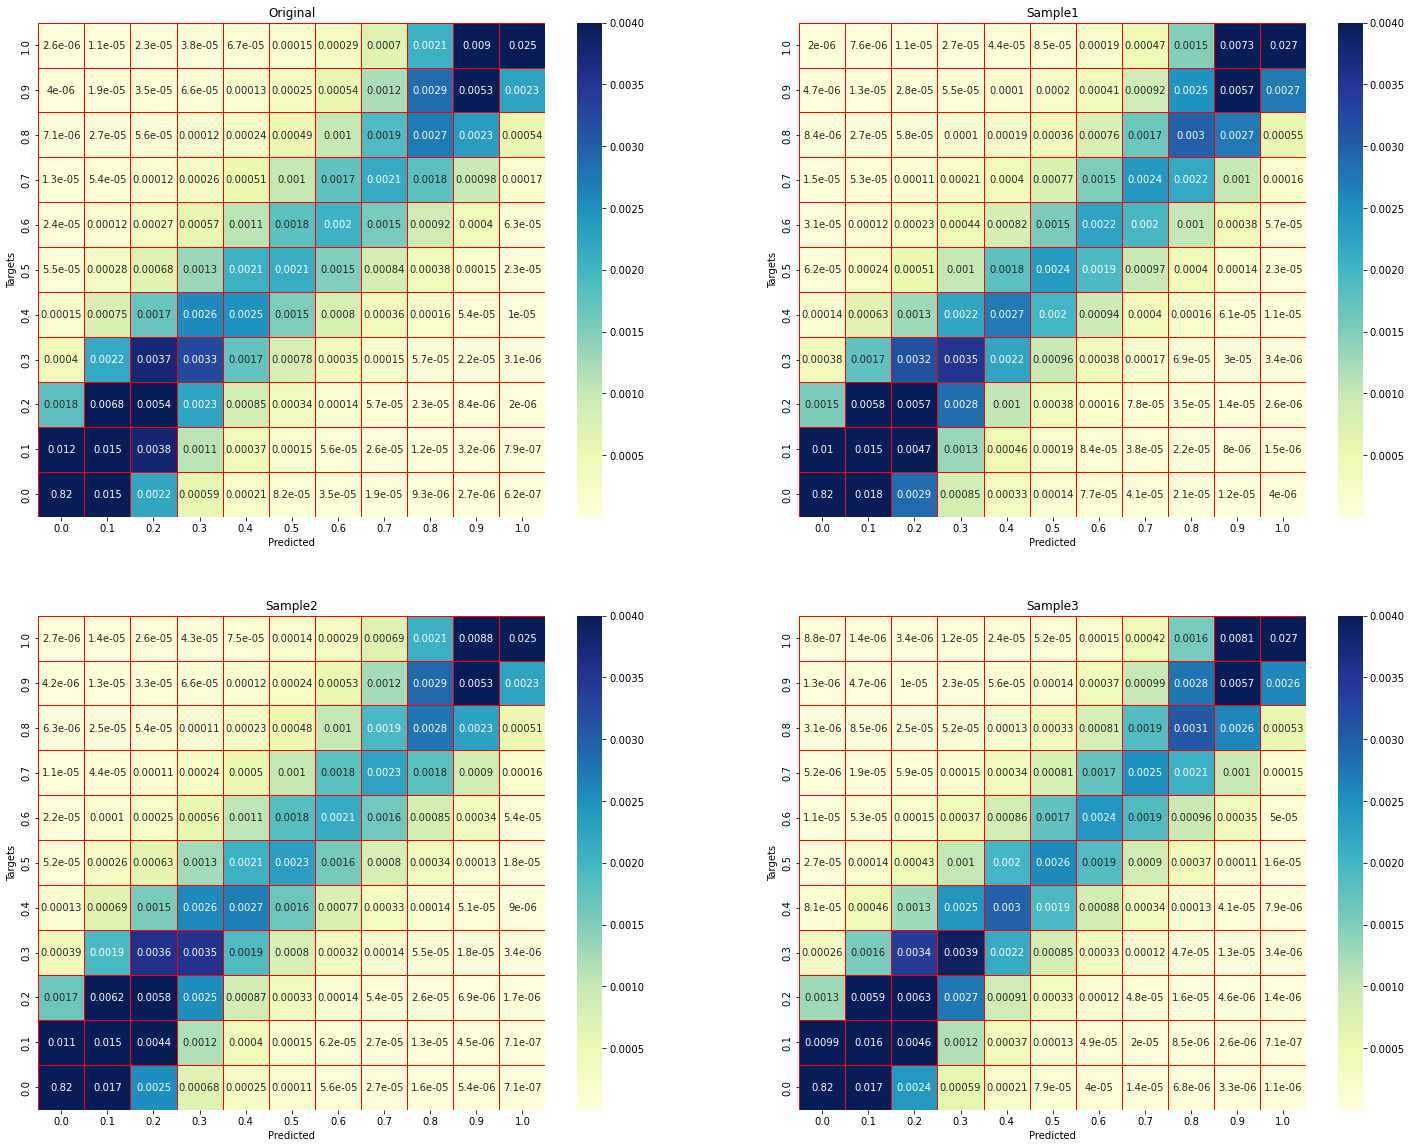

In [32]:
df=pd.DataFrame(np.round(custom2,1).flatten(),columns=['Predicted'])
df2=pd.DataFrame(np.round(targets,1).flatten(),columns=['Targets'])
df4=pd.DataFrame(np.round(custom2_subset1,1).flatten(),columns=['Predicted'])
df7=pd.DataFrame(np.round(custom2_subset2,1).flatten(),columns=['Predicted'])
df10=pd.DataFrame(np.round(custom2_subset3,1).flatten(),columns=['Predicted'])
df3 = pd.crosstab( df2['Targets'],df['Predicted']).div(len(df))
df6 = pd.crosstab( df2['Targets'],df4['Predicted']).div(len(df))
df9 = pd.crosstab( df2['Targets'],df7['Predicted']).div(len(df))
df11 = pd.crosstab( df2['Targets'],df10['Predicted']).div(len(df))
fig, ax = plt.subplots(2,2,figsize=(25,20))
sns.heatmap(df3,linewidths=.5,ax=ax[0,0],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[0,0].invert_yaxis()
ax[0,0].set(title='Original')
sns.heatmap(df6,linewidths=.5,ax=ax[0,1],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[0,1].invert_yaxis()
ax[0,1].set(title='Sample1')
sns.heatmap(df9,linewidths=.5,ax=ax[1,0],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[1,0].invert_yaxis()
ax[1,0].set(title='Sample2')
sns.heatmap(df11,linewidths=.5,ax=ax[1,1],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[1,1].invert_yaxis()
ax[1,1].set(title='Sample3')
plt.show()

## Figure 2-13

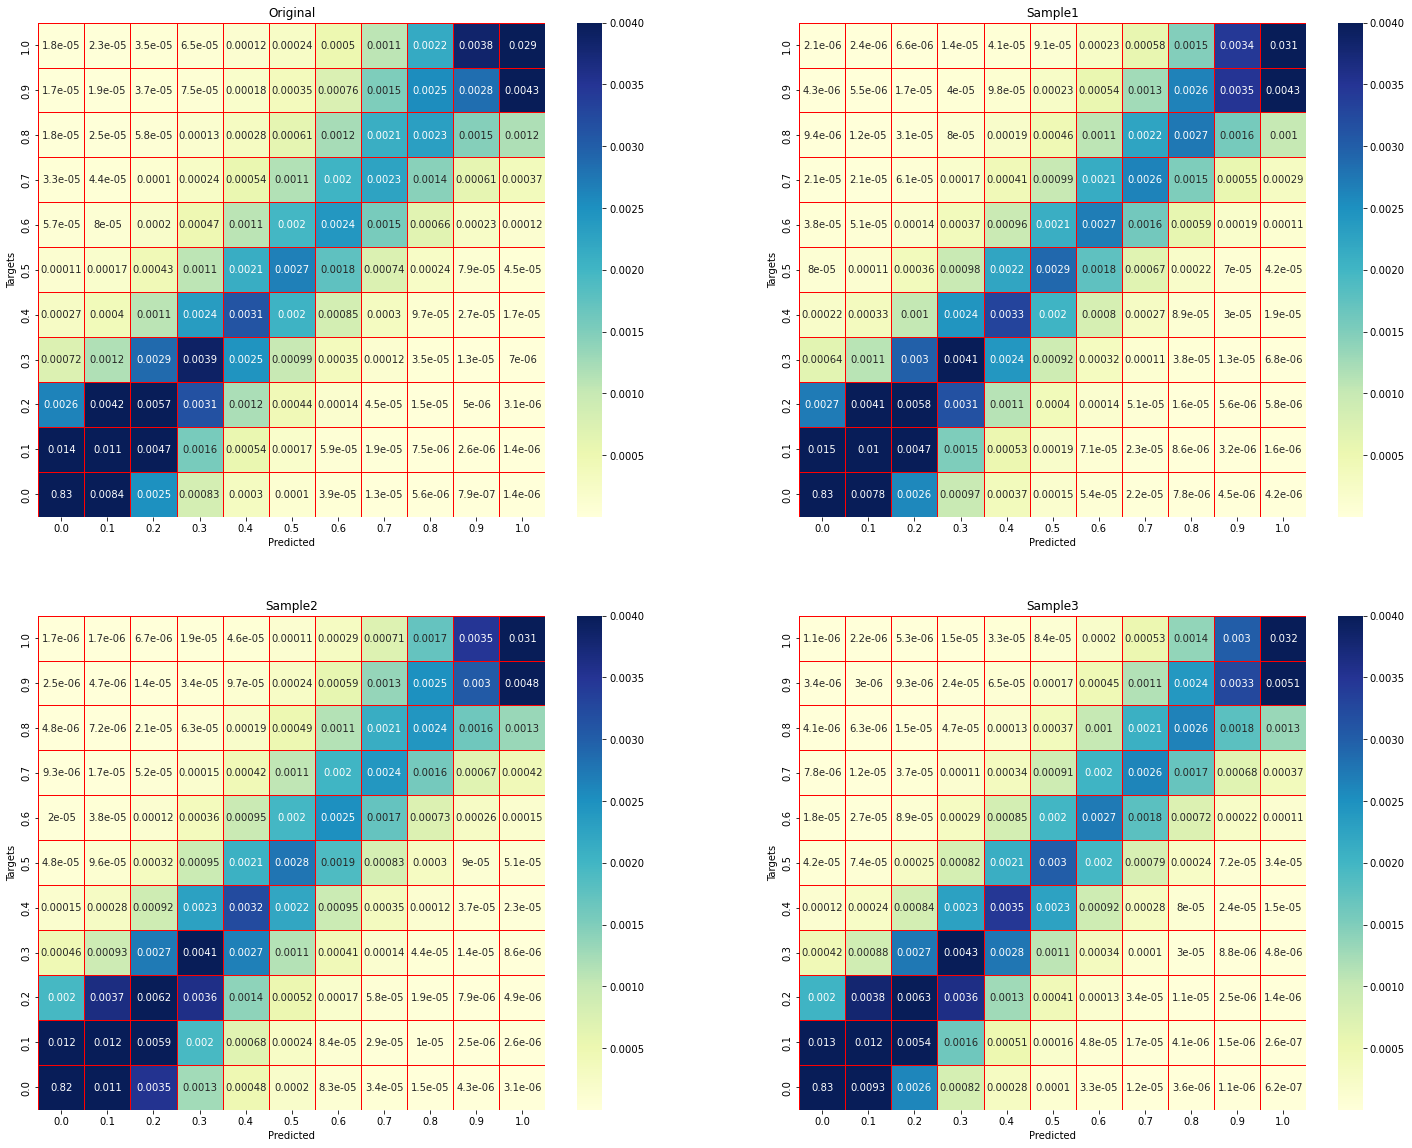

In [33]:
df=pd.DataFrame(np.round(c_l,1).flatten(),columns=['Predicted'])
df2=pd.DataFrame(np.round(targets,1).flatten(),columns=['Targets'])
df4=pd.DataFrame(np.round(c_l_subset1,1).flatten(),columns=['Predicted'])
df7=pd.DataFrame(np.round(c_l_subset2,1).flatten(),columns=['Predicted'])
df10=pd.DataFrame(np.round(c_l_subset3,1).flatten(),columns=['Predicted'])
df3 = pd.crosstab( df2['Targets'],df['Predicted']).div(len(df))
df6 = pd.crosstab( df2['Targets'],df4['Predicted']).div(len(df))
df9 = pd.crosstab( df2['Targets'],df7['Predicted']).div(len(df))
df11 = pd.crosstab( df2['Targets'],df10['Predicted']).div(len(df))
fig, ax = plt.subplots(2,2,figsize=(25,20))
sns.heatmap(df3,linewidths=.5,ax=ax[0,0],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[0,0].invert_yaxis()
ax[0,0].set(title='Original')
sns.heatmap(df6,linewidths=.5,ax=ax[0,1],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[0,1].invert_yaxis()
ax[0,1].set(title='Sample1')
sns.heatmap(df9,linewidths=.5,ax=ax[1,0],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[1,0].invert_yaxis()
ax[1,0].set(title='Sample2')
sns.heatmap(df11,linewidths=.5,ax=ax[1,1],vmax=0.004,annot=True,cmap="YlGnBu",linecolor='r',xticklabels=np.round(np.linspace(0,1,11),1),yticklabels=np.round(np.linspace(0,1,11),1))
ax[1,1].invert_yaxis()
ax[1,1].set(title='Sample3')
plt.show()

# Results

## Loading global data

In [35]:
nc=netCDF4.Dataset('bcf.nc')
BCF=nc.variables['cldamount'][:]
nc=netCDF4.Dataset('iwc.nc')
IWC=nc.variables['QCF'][:]
nc=netCDF4.Dataset('lwc.nc')
LWC=nc.variables['QCL'][:]
nc=netCDF4.Dataset('p.nc')
P=nc.variables['p'][:]
nc=netCDF4.Dataset('q.nc')
Q=nc.variables['q'][:]
nc=netCDF4.Dataset('temp.nc')
T=nc.variables['temp'][:]

In [36]:
lv       = 2.501e6
lf       = 2.834e6
cp       = 1005.0
lvovercp = lv / cp
lfovercp = lf / cp
newT=T-(lvovercp*LWC) - (lfovercp*IWC)

In [37]:
def qsat_wat_ice(T, P):
# Gives qsat_wat for T>273.15 and qsat_ice for T < 273.15
# T in Kelvin
# p in Pa
    epsilon=0.622
    esatwat=611.2*np.exp(17.67*(T-273.15)/(T-273.15+243.5))
    esatice=esatwat*(T/273.15)**2.66
    shape_tuple=np.shape(esatice)
    flag=np.zeros(shape_tuple)
    flag[T<273.15]=1.0
    esat=(flag*esatice)+((1.0-flag)*esatwat)
    # Convert to qsat
    denom=P-((1-epsilon)*esat)
    qsat=epsilon*(esat/denom)
    return qsat

In [38]:
qsat_gl=qsat_wat_ice(newT,P)
qsat_nn=qsat_wat_ice(temp,newp)
rh_t_gl=(Q+IWC+LWC)/qsat_gl
rh_t_nn=newq/qsat_nn

## Different types of clouds

In [39]:
mixed_gl_rh=rh_t_gl[np.logical_and(273.15>newT, newT>243.15) ]
mixed_gl_cf=BCF[np.logical_and(273.15>newT, newT>243.15) ]
mixed_nn_rh=rh_t_nn[np.logical_and(273.15>temp, temp>243.15) ]
mixed_nn_rh=rh_t_nn[np.logical_and(273.15>temp, temp>243.15) ]
mixed_target_cf=targets[np.logical_and(273.15>temp, temp>243.15) ]

mixed_sig=sigmoid[np.logical_and(273.15>temp, temp>243.15)]
mixed_msig=Msigmoid[np.logical_and(273.15>temp, temp>243.15)]
mixed_mrelu=Mrelu[np.logical_and(273.15>temp, temp>243.15)]
mixed_sig_sub3=sigmoid_sub3[np.logical_and(273.15>temp, temp>243.15)]
mixed_mrelu_sub3=Mrelu_sub3[np.logical_and(273.15>temp, temp>243.15)]
mixed_msig_sub3=Msigmoid_sub3[np.logical_and(273.15>temp, temp>243.15)]

In [40]:
warm_gl_rh=rh_t_gl[273.15<newT]
warm_gl_cf=BCF[273.15<newT ]
warm_nn_rh=rh_t_nn[273.15<temp]
warm_nn_rh=rh_t_nn[273.15<temp ]
warm_target_cf=targets[273.15<temp]

warm_sig=sigmoid[273.15<temp]
warm_msig=Msigmoid[273.15<temp]
warm_mrelu=Mrelu[273.15<temp]
warm_sig_sub3=sigmoid_sub3[273.15<temp]
warm_msig_sub3=Msigmoid_sub3[273.15<temp]
warm_mrelu_sub3=Mrelu_sub3[273.15<temp]

In [41]:
ice_gl_rh=rh_t_gl[243.15>newT]
ice_gl_cf=BCF[243.15>newT ]
ice_nn_rh=rh_t_nn[243.15>temp]
ice_nn_rh=rh_t_nn[243.15>temp ]
ice_target_cf=targets[243.15>temp]

ice_sig=sigmoid[243.15>temp]
ice_msig=Msigmoid[243.15>temp]
ice_mrelu=Mrelu[243.15>temp]
ice_sig_sub3=sigmoid_sub3[243.15>temp]
ice_msig_sub3=Msigmoid_sub3[243.15>temp]
ice_mrelu_sub3=Mrelu_sub3[243.15>temp]

## Figure 3-1

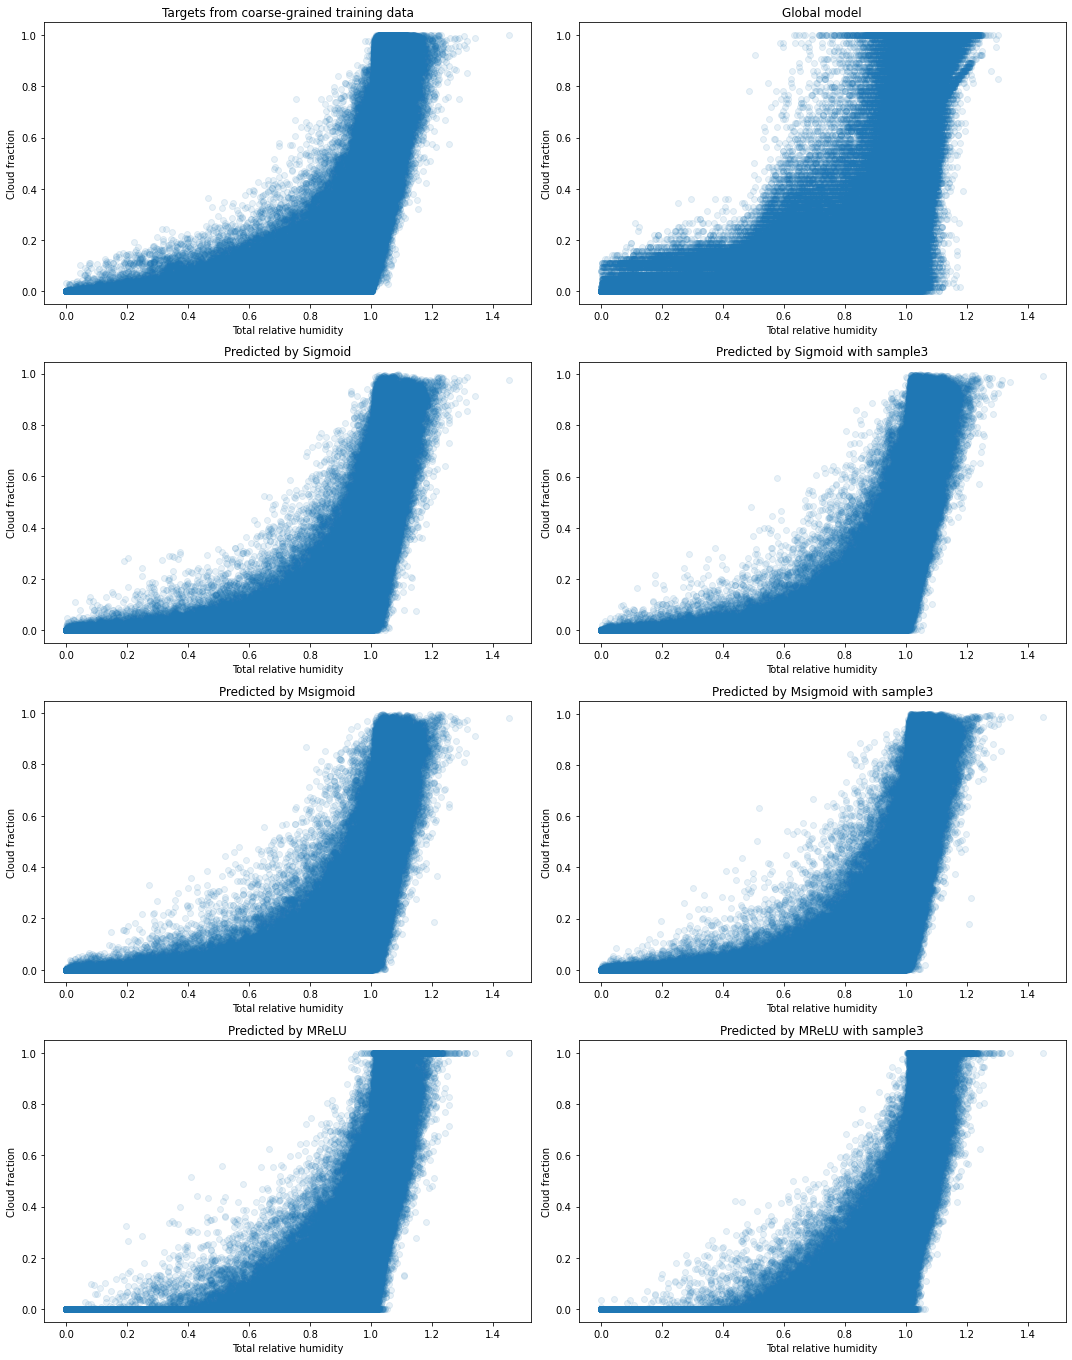

In [42]:
fig, ax = plt.subplots(4,2)
fig.set_figwidth(15)
fig.set_figheight(19)
ax[0,0].scatter(warm_nn_rh,warm_target_cf,alpha=0.1)
ax[0,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Targets from coarse-grained training data')
ax[0,1].scatter(warm_gl_rh,warm_gl_cf,alpha=0.1)
ax[0,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Global model',xlim=ax[0,0].get_xlim())
ax[3,0].scatter(warm_nn_rh,warm_mrelu,alpha=0.1)
ax[3,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by MReLU')
ax[1,0].scatter(warm_nn_rh,warm_sig,alpha=0.1)
ax[1,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Sigmoid')
ax[2,0].scatter(warm_nn_rh,warm_msig,alpha=0.1)
ax[2,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Msigmoid')
ax[3,1].scatter(warm_nn_rh,warm_mrelu_sub3,alpha=0.1)
ax[3,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by MReLU with sample3')
ax[1,1].scatter(warm_nn_rh,warm_sig_sub3,alpha=0.1)
ax[1,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Sigmoid with sample3')
ax[2,1].scatter(warm_nn_rh,warm_msig_sub3,alpha=0.1)
ax[2,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Msigmoid with sample3')
fig.tight_layout()
plt.show()

## Figure 3-2

In [43]:
means_tar=np.array([])
for i in range(50):
    if warm_target_cf[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].size==0:
        means_tar=np.append(means_tar,1)
    else:
        means_tar=np.append(means_tar,warm_target_cf[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].mean())

means_sig=np.array([])
for i in range(50):
    if warm_sig[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].size==0:
        means_sig=np.append(means_sig,1)
    else:
        means_sig=np.append(means_sig,warm_sig[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].mean())

means_mrelu=np.array([])
for i in range(50):
    if warm_mrelu[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].size==0:
        means_mrelu=np.append(means_mrelu,1)
    else:
        means_mrelu=np.append(means_mrelu,warm_mrelu[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].mean())

means_mrelu_sub3=np.array([])
for i in range(50):
    if warm_mrelu_sub3[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].size==0:
        means_mrelu_sub3=np.append(means_mrelu_sub3,1)
    else:
        means_mrelu_sub3=np.append(means_mrelu_sub3,warm_mrelu_sub3[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].mean())

means_msig=np.array([])
for i in range(50):
    if warm_msig[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].size==0:
        means_msig=np.append(means_msig,1)
    else:
        means_msig=np.append(means_msig,warm_msig[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].mean())

means_msig_sub3=np.array([])
for i in range(50):
    if warm_msig_sub3[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].size==0:
        means_msig_sub3=np.append(means_msig_sub3,1)
    else:
        means_msig_sub3=np.append(means_msig_sub3,warm_msig_sub3[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].mean())

means_sig_sub3=np.array([])
for i in range(50):
    if warm_sig_sub3[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].size==0:
        means_sig_sub3=np.append(means_sig_sub3,1)
    else:
        means_sig_sub3=np.append(means_sig_sub3,warm_sig_sub3[np.logical_and(warm_nn_rh>=(i*1.5)/50, warm_nn_rh<((i+1)*1.5)/50)].mean())

means_glo=np.array([])
for i in range(50):
    if warm_gl_cf[np.logical_and(warm_gl_rh>=(i*1.5)/50, warm_gl_rh<((i+1)*1.5)/50)].size==0:
        means_glo=np.append(means_glo,1)
    else:
        means_glo=np.append(means_glo,warm_gl_cf[np.logical_and(warm_gl_rh>=(i*1.5)/50, warm_gl_rh<((i+1)*1.5)/50)].mean())

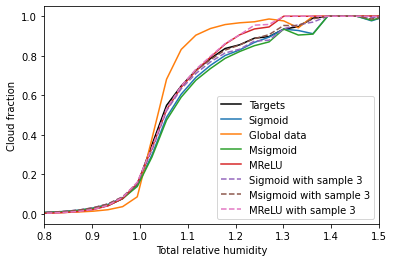

In [44]:
plt.plot(np.linspace(0,1.5,50)+0.015,means_tar,label='Targets',color='black')
plt.plot(np.linspace(0,1.5,50)+0.015,means_sig,label='Sigmoid')
plt.plot(np.linspace(0,1.5,50)+0.015,means_glo,label='Global data')
plt.plot(np.linspace(0,1.5,50)+0.015,means_msig,label='Msigmoid')
plt.plot(np.linspace(0,1.5,50)+0.015,means_mrelu,label='MReLU')
plt.plot(np.linspace(0,1.5,50)+0.015,means_sig_sub3,label='Sigmoid with sample 3',linestyle='dashed')
plt.plot(np.linspace(0,1.5,50)+0.015,means_msig_sub3,label='Msigmoid with sample 3',linestyle='dashed')
plt.plot(np.linspace(0,1.5,50)+0.015,means_mrelu_sub3,label='MReLU with sample 3',linestyle='dashed')
plt.legend()
plt.xlabel('Total relative humidity')
plt.ylabel('Cloud fraction')
plt.xlim((0.8,1.5))
plt.show()

## Figure 3-3

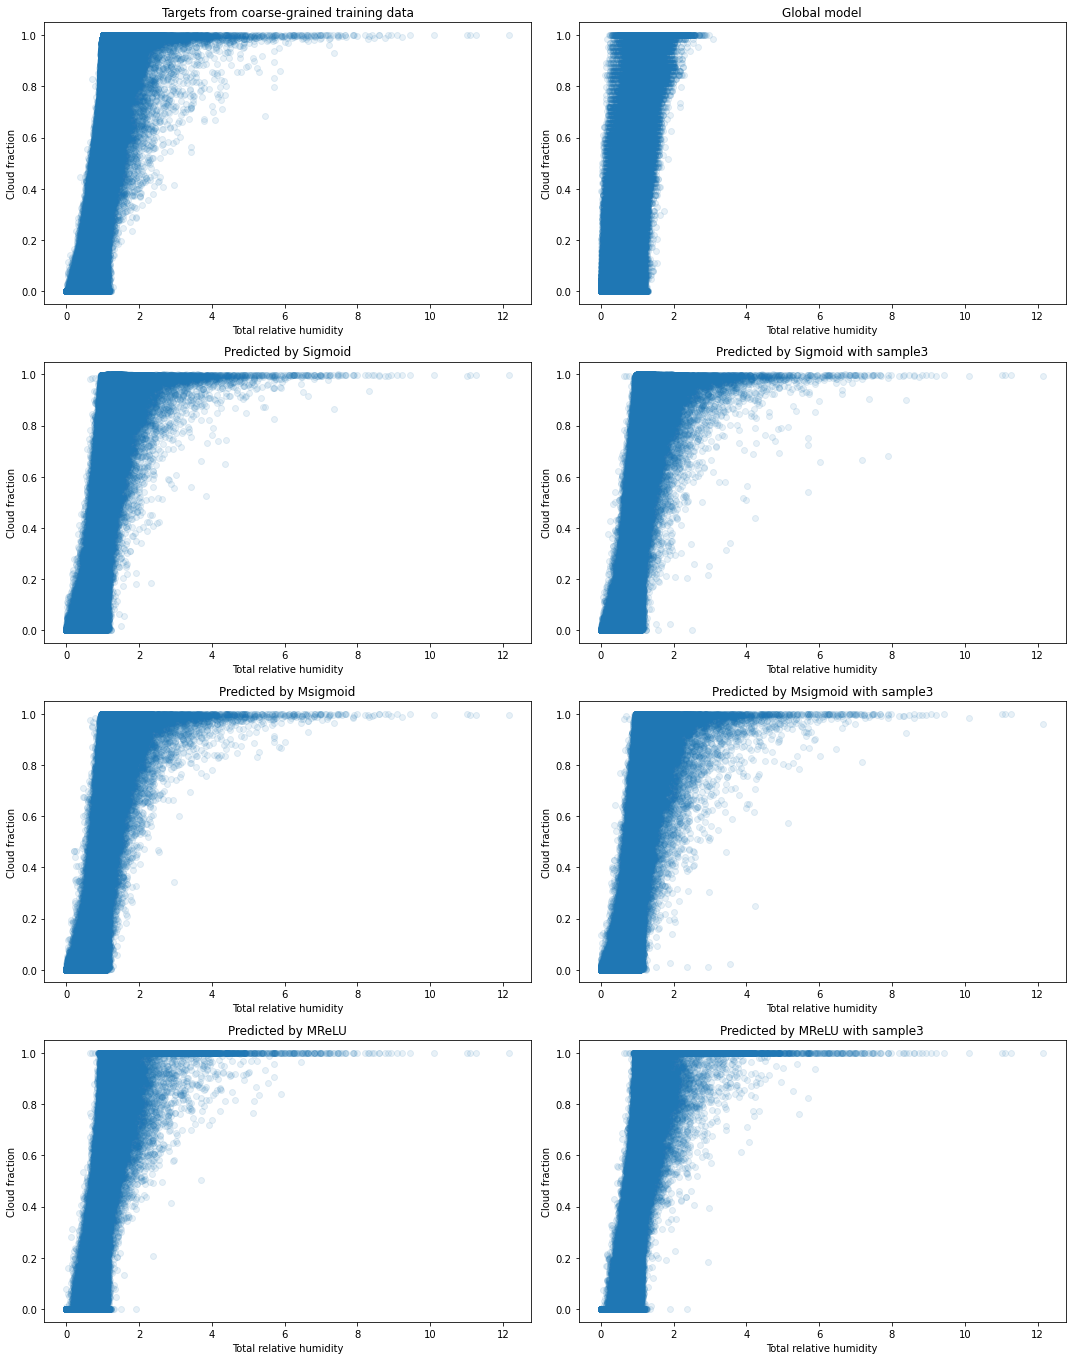

In [46]:
fig, ax = plt.subplots(4,2)
fig.set_figwidth(15)
fig.set_figheight(19)
ax[0,0].scatter(mixed_nn_rh,mixed_target_cf,alpha=0.1)
ax[0,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Targets from coarse-grained training data')
ax[0,1].scatter(mixed_gl_rh,mixed_gl_cf,alpha=0.1)
ax[0,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Global model',xlim=ax[0,0].get_xlim())
ax[3,0].scatter(mixed_nn_rh,mixed_mrelu,alpha=0.1)
ax[3,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by MReLU')
ax[1,0].scatter(mixed_nn_rh,mixed_sig,alpha=0.1)
ax[1,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Sigmoid')
ax[2,0].scatter(mixed_nn_rh,mixed_msig,alpha=0.1)
ax[2,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Msigmoid')
ax[3,1].scatter(mixed_nn_rh,mixed_mrelu_sub3,alpha=0.1)
ax[3,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by MReLU with sample3')
ax[1,1].scatter(mixed_nn_rh,mixed_sig_sub3,alpha=0.1)
ax[1,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Sigmoid with sample3')
ax[2,1].scatter(mixed_nn_rh,mixed_msig_sub3,alpha=0.1)
ax[2,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Msigmoid with sample3')
fig.tight_layout()
plt.show()

## Figure 3-4

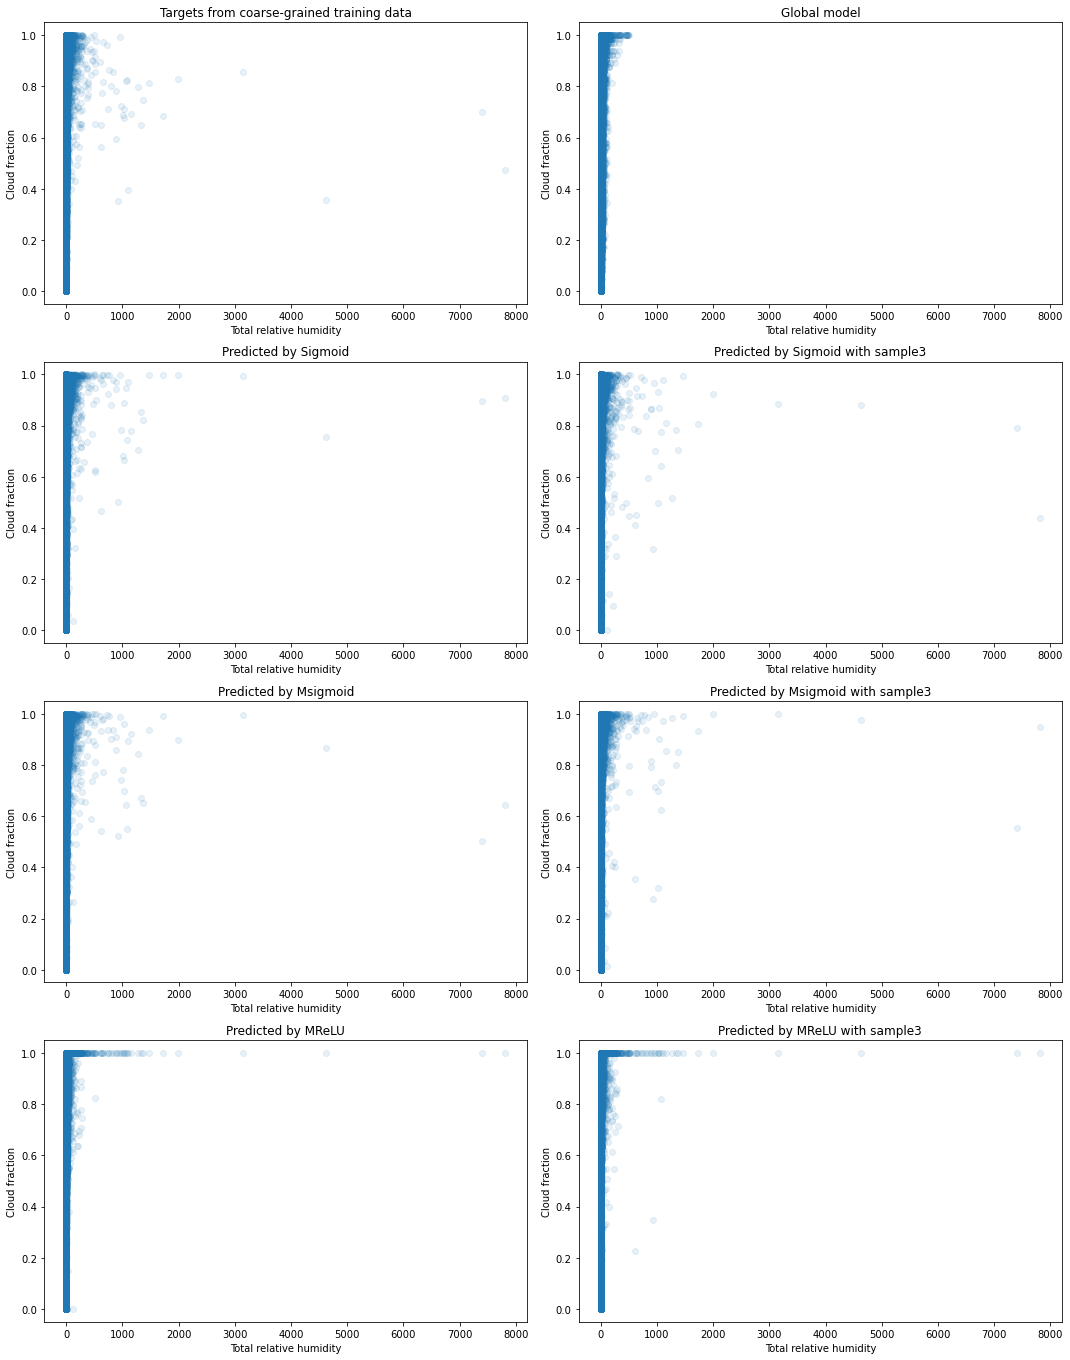

In [47]:
fig, ax = plt.subplots(4,2)
fig.set_figwidth(15)
fig.set_figheight(19)
ax[0,0].scatter(ice_nn_rh,ice_target_cf,alpha=0.1)
ax[0,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Targets from coarse-grained training data')
ax[0,1].scatter(ice_gl_rh,ice_gl_cf,alpha=0.1)
ax[0,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Global model',xlim=ax[0,0].get_xlim())
ax[3,0].scatter(ice_nn_rh,ice_mrelu,alpha=0.1)
ax[3,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by MReLU')
ax[1,0].scatter(ice_nn_rh,ice_sig,alpha=0.1)
ax[1,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Sigmoid')
ax[2,0].scatter(ice_nn_rh,ice_msig,alpha=0.1)
ax[2,0].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Msigmoid')
ax[3,1].scatter(ice_nn_rh,ice_mrelu_sub3,alpha=0.1)
ax[3,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by MReLU with sample3')
ax[1,1].scatter(ice_nn_rh,ice_sig_sub3,alpha=0.1)
ax[1,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Sigmoid with sample3')
ax[2,1].scatter(ice_nn_rh,ice_msig_sub3,alpha=0.1)
ax[2,1].set(xlabel='Total relative humidity',ylabel='Cloud fraction',title='Predicted by Msigmoid with sample3')
fig.tight_layout()
plt.show()